In [25]:
# Question 2

In [2]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


11490434/11490434 [==============================] - 1s 0us/step
784


In [24]:
#2.a Plot the loss and accuracy for both training data and validation data using the history object in the source code.

In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 7s 28ms/step - loss: 0.2839 - accuracy: 0.9138 - val_loss: 0.1155 - val_accuracy: 0.9631
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0987 - accuracy: 0.9694 - val_loss: 0.1174 - val_accuracy: 0.9623
Epoch 3/10
235/235 [==============================] - 9s 37ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.0889 - val_accuracy: 0.9717
Epoch 4/10
235/235 [==============================] - 8s 36ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0641 - val_accuracy: 0.9801
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0664 - val_accuracy: 0.9789
Epoch 6/10
235/235 [==============================] - 6s 23ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0773 - val_accuracy: 0.9804
Epoch 7/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.0619 - val_accuracy: 0.9840

In [5]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

history.history.keys()

313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9811
Evaluation result on Test Data : Loss = 0.07757890969514847, accuracy = 0.9811000227928162


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

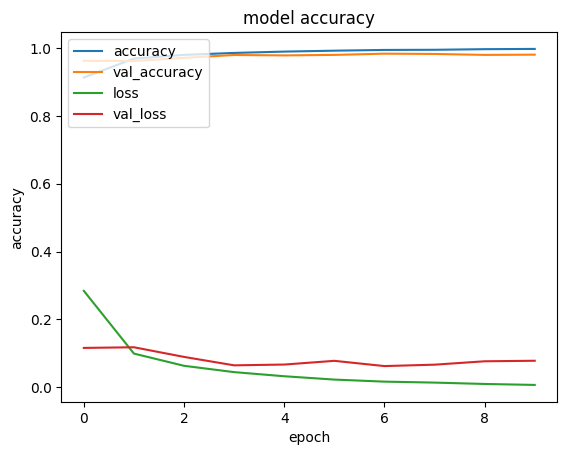

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()


In [22]:
# 2.b Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.


1/1 [==============================] - 0s 109ms/step
predicted label: [[1.0148513e-11 1.4476126e-10 1.3238239e-09 2.9665346e-08 1.2133385e-13
  2.7160796e-11 8.0293463e-15 1.0000000e+00 2.0528143e-11 5.3142619e-09]]


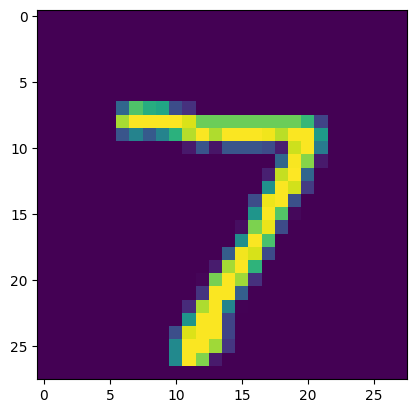

In [14]:
plt.imshow(test_data[0].reshape(28,28))
print("predicted label:",model.predict(test_data[0].reshape(1,784)))

In [21]:
# 2.c We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

In [16]:
#increasing the number of hidden layers to 6
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss1, test_acc1] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

Epoch 1/10
235/235 [==============================] - 18s 67ms/step - loss: 0.4805 - accuracy: 0.8431 - val_loss: 0.3580 - val_accuracy: 0.9087
Epoch 2/10
235/235 [==============================] - 15s 64ms/step - loss: 0.1275 - accuracy: 0.9630 - val_loss: 0.1722 - val_accuracy: 0.9525
Epoch 3/10
235/235 [==============================] - 18s 76ms/step - loss: 0.0798 - accuracy: 0.9773 - val_loss: 0.0803 - val_accuracy: 0.9770
Epoch 4/10
235/235 [==============================] - 16s 68ms/step - loss: 0.0551 - accuracy: 0.9839 - val_loss: 0.0854 - val_accuracy: 0.9768
Epoch 5/10
235/235 [==============================] - 16s 67ms/step - loss: 0.0412 - accuracy: 0.9878 - val_loss: 0.1043 - val_accuracy: 0.9690
Epoch 6/10
235/235 [==============================] - 15s 63ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.0849 - val_accuracy: 0.9789
Epoch 7/10
235/235 [==============================] - 15s 64ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0923 - val_accuracy:

In [18]:
#All hidden layers with tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(612, activation='tanh'))
model.add(Dense(712, activation='tanh'))
model.add(Dense(812, activation='tanh'))
model.add(Dense(712, activation='tanh'))
model.add(Dense(812, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss2, test_acc3] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss2, test_acc3))


Epoch 1/10
235/235 [==============================] - 29s 120ms/step - loss: 1.2410 - accuracy: 0.6902 - val_loss: 0.4478 - val_accuracy: 0.8723
Epoch 2/10
235/235 [==============================] - 26s 109ms/step - loss: 0.2964 - accuracy: 0.9157 - val_loss: 0.2058 - val_accuracy: 0.9407
Epoch 3/10
235/235 [==============================] - 26s 109ms/step - loss: 0.1965 - accuracy: 0.9430 - val_loss: 0.5866 - val_accuracy: 0.8627
Epoch 4/10
235/235 [==============================] - 28s 119ms/step - loss: 0.1515 - accuracy: 0.9561 - val_loss: 0.2061 - val_accuracy: 0.9437
Epoch 5/10
235/235 [==============================] - 26s 110ms/step - loss: 0.1212 - accuracy: 0.9643 - val_loss: 0.1614 - val_accuracy: 0.9543
Epoch 6/10
235/235 [==============================] - 25s 109ms/step - loss: 0.0962 - accuracy: 0.9711 - val_loss: 0.1388 - val_accuracy: 0.9636
Epoch 7/10
235/235 [==============================] - 24s 103ms/step - loss: 0.0768 - accuracy: 0.9770 - val_loss: 0.2264 - val_ac

In [20]:
# 2.d Run the same code without scaling the images and check the performance?

In [19]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss3, test_acc3] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))

(28, 28)
Epoch 1/10
235/235 [==============================] - 6s 25ms/step - loss: 6.3235 - accuracy: 0.8766 - val_loss: 1.2016 - val_accuracy: 0.8893
Epoch 2/10
235/235 [==============================] - 6s 28ms/step - loss: 0.4297 - accuracy: 0.9462 - val_loss: 0.6903 - val_accuracy: 0.9178
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2325 - accuracy: 0.9608 - val_loss: 0.2927 - val_accuracy: 0.9527
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1802 - accuracy: 0.9673 - val_loss: 0.2755 - val_accuracy: 0.9551
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1448 - accuracy: 0.9726 - val_loss: 0.2860 - val_accuracy: 0.9610
Epoch 6/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1274 - accuracy: 0.9777 - val_loss: 0.2740 - val_accuracy: 0.9648
Epoch 7/10
235/235 [==============================] - 6s 28ms/step - loss: 0.1298 - accuracy: 0.9792 - val_loss: 0.2653 - val_accurac